# Sieć neuronowa z pobudzeniem periodycznym

[*RK, AK, AS, APPA **100** (2001)*](http://przyrbwn.icm.edu.pl/APP/PDF/100/A100Z103.pdf)

$$
S_i(t+1)=\tanh(g h_i(t)+I(t))
$$

$$
h_i(t) = \sum \limits_j J_{ij} S_j(t)
$$

- $h_i(t)$ - pole lokalne działające na $i$-ty neuron
- $J_{ij} \in [-1,1]$ - połączenie synaptycze między neuronami $i$ i $j$
- obserwujemy globalną dynamikę: $\sigma(t) = \frac{1}{N}\sum \limits_{i=1}^N[S_i(0)-S_i(t)]^2$


In [1]:
using Plots, JLD
plotly()
# gr()
default(leg=false, lw=2, markersize=2)

In [2]:
# activation
f(x, g, I)=tanh.(g.*x.+I);

# local field
h(S,J)=J*S

# external stimulation
I(t,A,T)=A*sin(2π/T * t);

In [3]:
next_state(S, J, g, A, T, t)=f.(h(S,J),g,I(t,A,T))

stdev(S)=sum(S.^2)/length(S) # S0={0}

stdev (generic function with 1 method)

In [4]:
function step()
    global S=next_state(S, J, g, A, T, t)
    global t+=1
    stdev(S)
end

step (generic function with 1 method)

In [5]:
A=1 # amplituda pobudzenia
T=24 # okres pobudzenia
N=64 # number of neurons

S=zeros(N); # neuron states

In [6]:
# W oryginalnej pracy: łańcuch neuronów o sąsiedztwie 2k

# J=2 .*rand(N,N).-1; # connections
# J=rand((1,-1,0,0),N,N);  # rozrzedzona sieć
# save("w64_0x.jld","J",J)

In [7]:
J=load("w64_02.jld","J"); # 0.28 (1), 0.28624 (b.H.), 0.29 (QP), 0.291 (T=7), 0.294 (QP), 0.295 (QP-C), 0.318 (P), 0.321 (C)
# J=load("w64_04.jld","J"); # 0.27 (T=1), 0.2716 (bH), 0.273 (3), 0.27307, 0.284, 0.29 (13), 0.2945, 0.3 (3), 0.304, 0.306 (P), 0.307 (C)

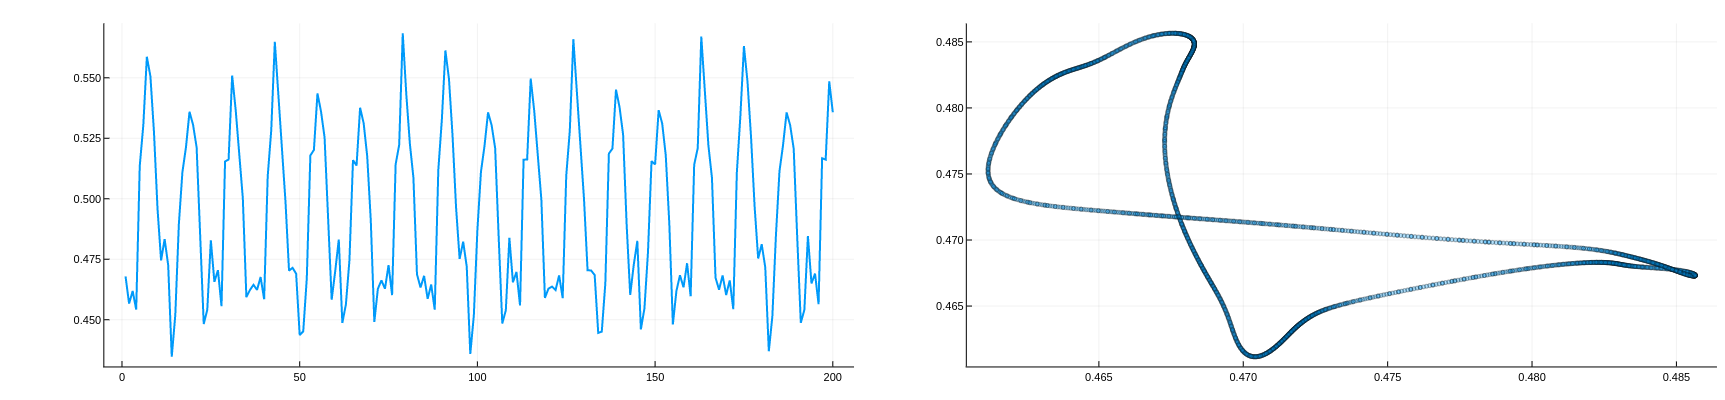

In [8]:
g=0.29
t=0

for i in 1:1000T # transient
    step();
end

x=[step() for i in 1:2000T];
p1=plot(x[1:200])
p2=scatter(x[1:T:end-T],x[T+1:T:end],alpha=0.3)
plot(p1, p2, size=(800,400))

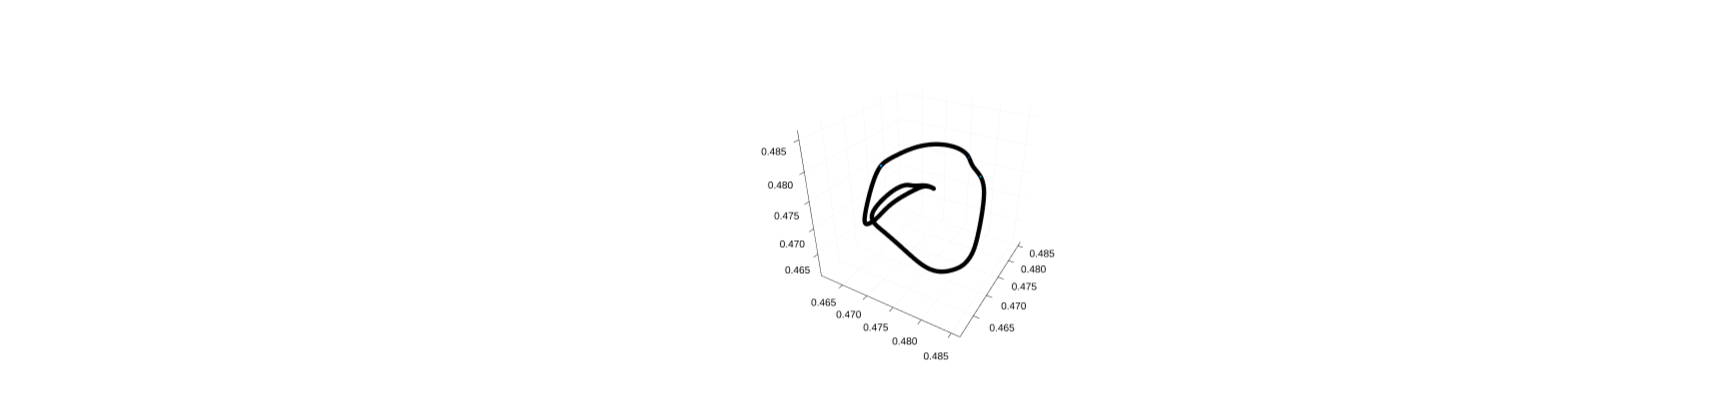

In [9]:
scatter(x[1:T:end-2T],x[1+T:T:end-T], x[1+2T:T:end], markersize=1)